In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
plt.style.use('bmh')

In [2]:
# importing data of previously cleaned and explored hourly1418SDGE.csv file
hSDGE1418=pd.read_csv('hourly1418SDGE.csv',  parse_dates=['Dates', 'Date'])

In [3]:
hSDGE1418.tail()

,Unnamed: 0,Dates,SDGE,Date,year,month,day,hour,weekday,season,holiday,non_working
43819,43819,2018-12-31 19:00:00,2609.685890,2018-12-31,2018,12,31,19,Monday,winter,0,0
43820,43820,2018-12-31 20:00:00,2504.283858,2018-12-31,2018,12,31,20,Monday,winter,0,0
43821,43821,2018-12-31 21:00:00,2389.460971,2018-12-31,2018,12,31,21,Monday,winter,0,0
43822,43822,2018-12-31 22:00:00,2259.741640,2018-12-31,2018,12,31,22,Monday,winter,0,0
43823,43823,2018-12-31 23:00:00,2123.183153,2018-12-31,2018,12,31,23,Monday,winter,0,0


In [4]:
del hSDGE1418['Unnamed: 0']

In [5]:
hSDGE1418.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 11 columns):
Dates          43824 non-null datetime64[ns]
SDGE           43824 non-null float64
Date           43824 non-null datetime64[ns]
year           43824 non-null int64
month          43824 non-null int64
day            43824 non-null int64
hour           43824 non-null int64
weekday        43824 non-null object
season         43824 non-null object
holiday        43824 non-null int64
non_working    43824 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 3.7+ MB


In [7]:
hSDGE1418.describe().T

,count,mean,std,min,25%,50%,75%,max
SDGE,43824.0,2364.928692,481.066444,1437.081129,1995.046696,2298.0,2622.00,4867.0
year,43824.0,2016.000000,1.413842,2014.000000,2015.000000,2016.0,2017.00,2018.0
month,43824.0,6.523549,3.448572,1.000000,4.000000,7.0,10.00,12.0
day,43824.0,15.727820,8.799425,1.000000,8.000000,16.0,23.00,31.0
hour,43824.0,11.500000,6.922266,0.000000,5.750000,11.5,17.25,23.0
holiday,43824.0,0.027382,0.163196,0.000000,0.000000,0.0,0.00,1.0
non_working,43824.0,0.313253,0.463822,0.000000,0.000000,0.0,1.00,1.0


#### To see the impact of weather (specifically the temperature) on the energy consumption, we have imported the hourly temperature data from https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00684/html



In [8]:
# Bringing in weather data from https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00684/html
weatherdf_all = pd.read_csv('houry_data_NOAA_2014_2018.csv')

C:\Users\ppawar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,5,7,8,11,14,19,25,26,27,28,29,30,31,32,35,36,43,48,49,53,56,58,59,69,71,72,88,95,96,97,98,99,100,101,102,103,104,105,106,107,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
#weatherdf.columns.values

# Keeping only the relevant columns 
weatherdf = weatherdf_all[['STATION', 'DATE', 'DailyCoolingDegreeDays','DailyHeatingDegreeDays', 'HourlyDryBulbTemperature']]

* __There are two weather stations for which the data has been recorded. We'll use the San Diego International airport data for this project__

In [11]:
# San Diego international airport station is represented by the 72290023188 station id
weatherdf_air = weatherdf[weatherdf.STATION == 72290023188]
weatherdf_air.head()

,STATION,DATE,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
0,72290023188,2014-01-01T00:07:00,NaN,NaN,52
1,72290023188,2014-01-01T00:14:00,NaN,NaN,52
2,72290023188,2014-01-01T00:22:00,NaN,NaN,52
3,72290023188,2014-01-01T00:32:00,NaN,NaN,52
4,72290023188,2014-01-01T00:42:00,NaN,NaN,50


In [12]:
# COnverting the DATE column to datetime
weatherdf_air['DATE'] = pd.to_datetime(weatherdf_air['DATE'])

C:\Users\ppawar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
weatherdf_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61956 entries, 0 to 61955
Data columns (total 5 columns):
STATION                     61956 non-null int64
DATE                        61956 non-null datetime64[ns]
DailyCoolingDegreeDays      1826 non-null object
DailyHeatingDegreeDays      1826 non-null object
HourlyDryBulbTemperature    60060 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.8+ MB


In [14]:
# The daily cooling and heating degree days are recorded at the 23rd hour of every day, so for analytical purposes we can 
# backfill the missing values; but if these values are to be used an appropriate groupby or resample method should be used, 
# as they represent daily values, not hourly
weatherdf_air[['DailyCoolingDegreeDays','DailyHeatingDegreeDays']] = \
                weatherdf_air[['DailyCoolingDegreeDays','DailyHeatingDegreeDays']].fillna(method='bfill')

C:\Users\ppawar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [15]:
weatherdf_air.head()

,STATION,DATE,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
0,72290023188,2014-01-01 00:07:00,0,7,52
1,72290023188,2014-01-01 00:14:00,0,7,52
2,72290023188,2014-01-01 00:22:00,0,7,52
3,72290023188,2014-01-01 00:32:00,0,7,52
4,72290023188,2014-01-01 00:42:00,0,7,50


In [16]:
weatherdf_air[weatherdf_air.isna().any(axis=1)].head()

,STATION,DATE,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
53,72290023188,2014-01-01 23:59:00,0,7,NaN
103,72290023188,2014-01-02 23:59:00,0,6,NaN
146,72290023188,2014-01-03 23:59:00,0,9,NaN
179,72290023188,2014-01-04 23:59:00,0,4,NaN
209,72290023188,2014-01-05 23:59:00,0,3,NaN


In [17]:
# The weather station reports the daily cooling and heating degree days at 23:59:00 of each day, but for the same time it
# renders the dry bulb temperature as NaN. Since it's night time and the only one hour is missing we can use forward fill to
# take the previous hour's temperature.
weatherdf_air = weatherdf_air.fillna(method='ffill')

In [18]:
# Again checking for null values
weatherdf_air[weatherdf_air.isna().any(axis=1)].head()

,STATION,DATE,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature


In [19]:
# Converting the degree days and temperature columns to numeric and using errors='coerce', to force convert any string 
# to numeric value. This (error='coerce') method was used only after confirming that very few values were of string type
# so we don't lose any valuable data by using the above method. 
weatherdf_air['DailyCoolingDegreeDays'] = pd.to_numeric(weatherdf_air['DailyCoolingDegreeDays'], errors='coerce')
weatherdf_air['DailyHeatingDegreeDays'] = pd.to_numeric(weatherdf_air['DailyHeatingDegreeDays'], errors='coerce')
weatherdf_air['HourlyDryBulbTemperature'] = pd.to_numeric(weatherdf_air['HourlyDryBulbTemperature'], errors='coerce')

In [20]:
weatherdf_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61956 entries, 0 to 61955
Data columns (total 5 columns):
STATION                     61956 non-null int64
DATE                        61956 non-null datetime64[ns]
DailyCoolingDegreeDays      61956 non-null float64
DailyHeatingDegreeDays      61956 non-null float64
HourlyDryBulbTemperature    61953 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.8 MB


In [21]:
# Since the weather data is captured every 7 minutes here and the energy consumption data is hourly data, resample the weather
# data in hourly intervals and calculate average temperature for each hour; storing the resampled df as hourly_weather
hourly_weather = weatherdf_air.set_index('DATE').resample('H').mean()
hourly_weather.head()

,STATION,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
DATE,,,,
2014-01-01 00:00:00,72290023188,0.0,7.0,51.0
2014-01-01 01:00:00,72290023188,0.0,7.0,51.5
2014-01-01 02:00:00,72290023188,0.0,7.0,51.8
2014-01-01 03:00:00,72290023188,0.0,7.0,50.0
2014-01-01 04:00:00,72290023188,0.0,7.0,48.8


In [22]:
hourly_weather[hourly_weather.isna().any(axis=1)].sum()

STATION                     0.0
DailyCoolingDegreeDays      0.0
DailyHeatingDegreeDays      0.0
HourlyDryBulbTemperature    0.0
dtype: float64

In [23]:
# resetting the index of the hourly_weather file to merge with the energy data
hourly_weather = hourly_weather.reset_index()

In [24]:
# Creating a new dataframe wehSDGE1418 by merging the energy dataframe- hSDGE1418 and the hourly_weather dataframe. Merging on 
# the Dates column of the both the dataframes and using outer to see if any of the two dataframes has values which are missing
# in the other dataframe
wehSDGE1418 = pd.merge(hSDGE1418, hourly_weather, how = 'outer', left_on = 'Dates', right_on= 'DATE')

In [25]:
wehSDGE1418[wehSDGE1418.isna().any(axis=1)].sum()

Dates                       0.0
SDGE                        0.0
Date                        0.0
year                        0.0
month                       0.0
day                         0.0
hour                        0.0
weekday                     0.0
season                      0.0
holiday                     0.0
non_working                 0.0
DATE                        0.0
STATION                     0.0
DailyCoolingDegreeDays      0.0
DailyHeatingDegreeDays      0.0
HourlyDryBulbTemperature    0.0
dtype: float64

In [27]:
# Since no null values were found, all the rows from hSDGE1418 were matched with the hourly_weather rows on their respective
# date columns

* __Plotting the energy and weather data together to check for any potential correlation__

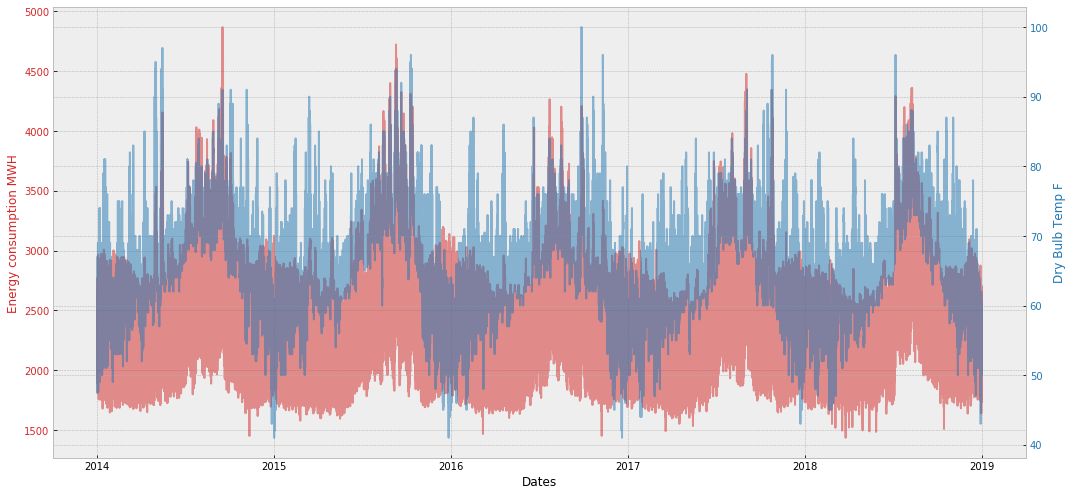

In [29]:
# Plotting the energy and weather data on the same graph as line plots
fig, ax1 = plt.subplots(figsize=(15,7))

color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Energy consumption MWH', color=color)
ax1.plot(wehSDGE1418['Dates'],wehSDGE1418['SDGE'], color=color, alpha=0.5)         
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Dry Bulb Temp F', color=color)  # we already handled the x-label with ax1
ax2.plot(wehSDGE1418['Dates'],wehSDGE1418['HourlyDryBulbTemperature'], color=color, alpha=0.5)   
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

* __We see that the energy and temperature data tend to follow each other and seem to have some level of correlation betweem them.__


* __We can see the correlations using seaborn regplots and also by using the scipy.stats.pearsonr function. The scipy.stats.pearsonr function returns the pearsonr coefficient and the pvalue of observing such coefficient if we were to assume that there was no correlation between the x and y data sets. Let's select a signifance level of 5%, and so if the pvalue is <5%, we will assume that the correlation coefficienct returned is significant.__

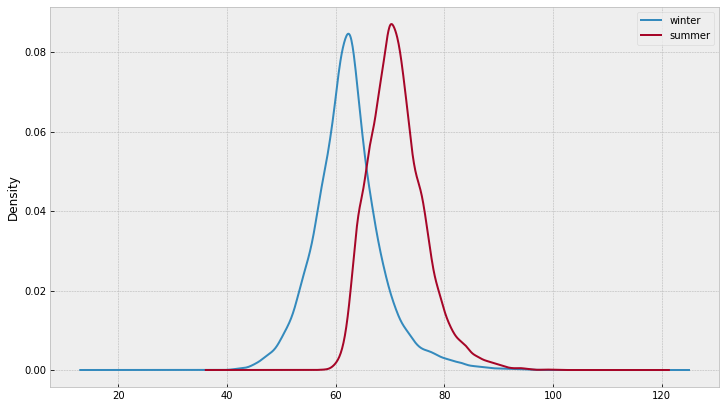

In [31]:
# Looking at distribution of temperature over the summer and winter seasons first
for season in wehSDGE1418['season'].unique():
    wehSDGE1418[wehSDGE1418['season']==season]['HourlyDryBulbTemperature'].\
    plot(kind='density', figsize=(12,7), legend=True, label=season)

__The temperature distribution looks neat and makes us realize why San Diego is known for its pleasant weather.__

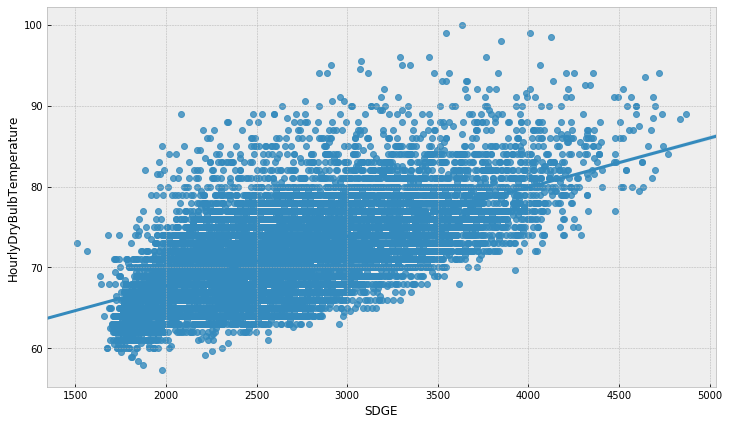

In [34]:
# Plotting the linear regression plot between the energy consumption and temperature
plt.figure(figsize=(12,7))
sns.regplot( x= 'SDGE', y= 'HourlyDryBulbTemperature' , data= \
            wehSDGE1418[(wehSDGE1418['season']=='summer') & (wehSDGE1418['hour'].isin(np.arange(0,23)))]) 

__There seems to be a pretty decent correlation between the energy consumption and the temperature which is expected because high heat calls out for more air conditioning and refrigeration loads.__

In [35]:
# Let's calculate the pearsonr coefficient between the energy and temperature
scipy.stats.pearsonr(wehSDGE1418['SDGE'], wehSDGE1418['HourlyDryBulbTemperature'])

(0.5746215681808322, 0.0)

__So the correlation between the energy consumption and the temperature is positive and also since the pvalue is almost 0, the result is not a result of a random chance.__

In [36]:
# Calculating the same pearson coefficient for winter and summer seasons to check the assumption that the summer season will
# havea  higher correlation due to higher cooling loads calling out for higher energy consumption
for season in wehSDGE1418['season'].unique():
    corrcoef, pvalue = scipy.stats.pearsonr(wehSDGE1418[wehSDGE1418['season']==season]['SDGE'], \
                                            wehSDGE1418[wehSDGE1418['season']==season]['HourlyDryBulbTemperature'])
    print('pearson correlation coefficient and pvalue for '+season, corrcoef, pvalue)

pearson correlation coefficient and pvalue for winter 0.3205585523995764 0.0
pearson correlation coefficient and pvalue for summer 0.650039994883929 0.0


__As expected the correlation coefficient for summer is higher than that for the winter (almost twice).__

In [38]:
# Checking the same correlation coefficient but restricting the hours to sunlight hours

#for season in wehSDGE1418['season'].unique():
#    corrcoef, pvalue = scipy.stats.pearsonr(wehSDGE1418[(wehSDGE1418['season']==season) & \
#                                                        (wehSDGE1418['hour'].isin(np.arange(12, 16)))]\
#                                            ['SDGE'], \
#                                            wehSDGE1418[(wehSDGE1418['season']==season) & \
#                                                        (wehSDGE1418['hour'].isin(np.arange(12,16)))]\
#                                            ['HourlyDryBulbTemperature'])
#    print('pearson correlation coefficient and pvalue for '+season, corrcoef, pvalue)

#### As observed in the 'Capstone_SDGE_hourly_energy_data_exploration.ipynb' notebook, the energy consumption for daylight hours seems to have decreased from 2014 to 2018. Now, this can be due to sricter energy efficiency measures being mandated, or increase of incentives for different categories of ratepayers (residential, commercial, agriculture, etc.) to install self-generation resources like solar, wind, etc. and/or energy storage in their premises to avoid the peak loads. 

* __ It was observed that the energy consumption decrease over the years is more dominant over the daylight hours, so we can test the theory that maybe solar capacity installed in the utility region has increased over the years, which it has as we will see below.__

* __ The solar installations data was imported from https://www.californiadgstats.ca.gov/downloads/ -> 'NEM Currently Interconnected Data Set'. This dataset contains a lots of parameters like, the approval date which represents the date when the system was conneceted to the grid, 'System Size AC' which represents the total kW power in AC of the solar panels installed at a site. To get more details about the data, one can check the NEM_CurrentlyInterconnectedDataKey.b29667e204f3.xlsx workbook in the repo.

In [39]:
# importing solar installations data from https://www.californiadgstats.ca.gov/downloads/NEM Currently Interconnected Data Set
nemsolar = pd.read_csv('NEM_CurrentlyInterconnectedDataset_2019-03-31.csv')
nemsolar.head()

C:\Users\ppawar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,11,12,13,20,25,26,27,28,29,30,32,33,34,37,38,45,46,48,49,51,52,54,55,57,58,60,61,63,64,66,67,69,70,72,73,75,76,78,79,81,82,84,85,87,88,90,91,96,97,99,100,102,103,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,159,160,162,163,165,166,168,169,171,172,174,175,177,178) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Application Id,Matched CSI Application Number,Application Status,Utility,Service City,Service Zip,Service County,Technology Type,System Size DC,System Size AC,...,Inverter Quantity 26,Inverter Model 27,Inverter Manufacturer 27,Inverter Quantity 27,Inverter Model 28,Inverter Manufacturer 28,Inverter Quantity 28,Inverter Model 29,Inverter Manufacturer 29,Inverter Quantity 29
0,PGE-INT-106960619,PGE-CSI-05317,Interconnected,PGE,SAN FRANCISCO,94107.0,SAN FRANCISCO,Solar PV,2.670,2.510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PGE-INT-106960688,PGE-CSI-22814,Interconnected,PGE,UNION CITY,94587.0,ALAMEDA,Solar PV,133.069,127.747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PGE-INT-106960698,NaN,Interconnected,PGE,SAN FRANCISCO,94127.0,SAN FRANCISCO,Solar PV,5.914,5.677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PGE-INT-111910270,NaN,Interconnected,PGE,Woodland,95776.0,Yolo,Solar PV,2314.752,2268.457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PGE-INT-111911601,NaN,Interconnected,PGE,SHAFTER,93263.0,KERN,Solar PV,1909.670,1871.477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Keeping only the relevant columns
nemsolar = nemsolar [['Application Id','Matched CSI Application Number',  'Application Status', \
                      'Utility', 'Service City', 'Service Zip', 'Service County', 'System Size AC', \
                      'App Approved Date',  'Electric Vehicle', 'Electric Vehicle Count']]

In [41]:
nemsolar.Utility.unique()

array(['PGE', 'SCE', 'SDGE', nan], dtype=object)

In [42]:
# We are dealing with the energy data of SDGE only, so extract SDGE's data
nemsolarSDGE = nemsolar[nemsolar['Utility']== 'SDGE']

In [43]:
nemsolarSDGE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149779 entries, 715617 to 865395
Data columns (total 11 columns):
Application Id                    149779 non-null object
Matched CSI Application Number    16902 non-null object
Application Status                149779 non-null object
Utility                           149779 non-null object
Service City                      149779 non-null object
Service Zip                       149779 non-null float64
Service County                    149779 non-null object
System Size AC                    149779 non-null float64
App Approved Date                 149779 non-null object
Electric Vehicle                  128608 non-null object
Electric Vehicle Count            98110 non-null float64
dtypes: float64(3), object(8)
memory usage: 13.7+ MB


In [44]:
# It's good to have the above data if in the future we decide to use the county or zipcode information but for now, let's
# focus on the approved date, i.e. the date the system was allowed by SDGE to start operation), and 'System Size AC', i.e. the 
# installed system capacity of the solar panels in kW
SDGEPV = nemsolarSDGE[['App Approved Date','System Size AC']]

In [45]:
SDGEPV = SDGEPV.rename({'App Approved Date': 'date_approved','System Size AC':'AC_kW' }, axis='columns').reset_index()

In [46]:
SDGEPV['date_approved'] = pd.to_datetime(SDGEPV['date_approved'])

In [47]:
SDGEPV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149779 entries, 0 to 149778
Data columns (total 3 columns):
index            149779 non-null int64
date_approved    149779 non-null datetime64[ns]
AC_kW            149779 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.4 MB


In [48]:
SDGEPV = SDGEPV.set_index('date_approved').sort_index()
del SDGEPV['index']

In [49]:
SDGEPV.head()

,AC_kW
date_approved,
1999-01-20,2.5
1999-03-30,2.0
1999-08-06,4.0
1999-08-30,1.5
1999-08-31,4.0


In [50]:
# Using groupby to sum the system size installed for each day
SDGEPV = SDGEPV.reset_index()
SDGEPVM = SDGEPV.groupby('date_approved').sum()
SDGEPVM.head()

,AC_kW
date_approved,
1999-01-20,2.5
1999-03-30,2.0
1999-08-06,4.0
1999-08-30,1.5
1999-08-31,4.0


In [51]:
# using a cumulative of the system size, since this is what we are interested in. We want to see how the total solar capacity
# in the region increased overall
SDGEPVM['cum_AC_kW'] = SDGEPVM['AC_kW'].cumsum()

In [52]:
# Truncating the PV installation data to the min and max dates limits of the 'weather+energy' data-wehSDGE1418 and storing it
# as SDGEPVM
SDGEPVM = SDGEPVM.loc[wehSDGE1418.Date.min():wehSDGE1418.Date.max(), ['AC_kW','cum_AC_kW']].reset_index()

In [53]:
# Creating a dataframe df by merging the wehSDGE1418 and SDGEPVM datasets using merge on the wehSDGE1418 dataframe
# because we don't want to disturb the indices of out original energy dataset.
df = pd.merge(wehSDGE1418, SDGEPVM, left_on = 'Date', right_on = 'date_approved', how = 'left')

In [54]:
# dropping duplicate date columns
df.drop(['DATE', 'date_approved'], axis=1, inplace=True)

In [55]:
df.head()

,Dates,SDGE,Date,year,month,day,hour,weekday,season,holiday,non_working,STATION,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature,AC_kW,cum_AC_kW
0,2014-01-01 00:00:00,2096.0,2014-01-01,2014,1,1,0,Wednesday,winter,1,1,72290023188,0.0,7.0,51.0,NaN,NaN
1,2014-01-01 01:00:00,1986.0,2014-01-01,2014,1,1,1,Wednesday,winter,1,1,72290023188,0.0,7.0,51.5,NaN,NaN
2,2014-01-01 02:00:00,1936.0,2014-01-01,2014,1,1,2,Wednesday,winter,1,1,72290023188,0.0,7.0,51.8,NaN,NaN
3,2014-01-01 03:00:00,1896.0,2014-01-01,2014,1,1,3,Wednesday,winter,1,1,72290023188,0.0,7.0,50.0,NaN,NaN
4,2014-01-01 04:00:00,1899.0,2014-01-01,2014,1,1,4,Wednesday,winter,1,1,72290023188,0.0,7.0,48.8,NaN,NaN


In [58]:
df.isna().sum()

Dates                           0
SDGE                            0
Date                            0
year                            0
month                           0
day                             0
hour                            0
weekday                         0
season                          0
holiday                         0
non_working                     0
STATION                         0
DailyCoolingDegreeDays          0
DailyHeatingDegreeDays          0
HourlyDryBulbTemperature        0
AC_kW                       12264
cum_AC_kW                   12264
dtype: int64

In [59]:
# Since, not everyday solar panels were installed, the SDGEPVM dataframe didn't have all the rows as our energy dataframe
# wehSDGE1418 which resulted in missing values in the AC_kW and cum_AC_kW columns

# We don't need to change the AC_kW columns for now, we can just put a 0 in place of NaN to indicate 0 installations for that 
# day but not focusing on that for now.

#Since the cumulative installed solar system size should remain same until the next non-na value is 
# encountered, using forward fill method to fill the cum_AC_kW  column
df['cum_AC_kW'] = df['cum_AC_kW'].fillna(method='ffill')

In [60]:
# Forward fill worked on all the rows except the first few rows because the data for SDGEPVM didn't start at 2014-01-01 00:00;
# so, we can use backfill here to fill in the first few missing values
df['cum_AC_kW'] = df['cum_AC_kW'].fillna(method='bfill')

In [61]:
SDGE_t_pv = df.set_index('Dates')

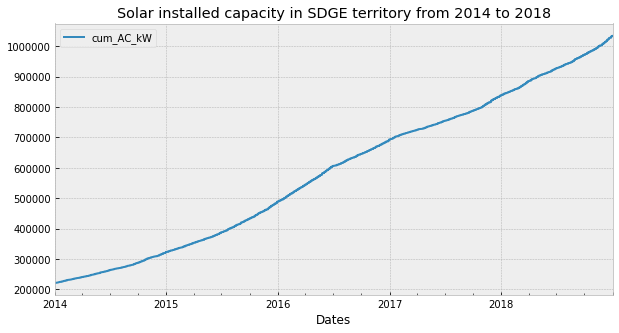

In [65]:
_ = SDGE_t_pv.cum_AC_kW.plot(figsize=(10,5))
_ = plt.legend()
_ = plt.title('Solar installed capacity in SDGE territory from 2014 to 2018')

__There was a considerable increase in the solar installations in the SDGE territory over the past 5 years and the installed capacity reached the 1MW mark at the end of 2018.__

* __Let's calculate the pearson correlation coefficient between the energy consumption and installed PV capacity (restricting the hours to peak sunlight hours, roughy 9am to 5pm).__

In [76]:
daylight_hours = np.arange(9, 17)
for season in SDGE_t_pv['season'].unique():
    corrcoef, pvalue = scipy.stats.pearsonr(SDGE_t_pv[(SDGE_t_pv['season']==season) & \
                                                        (SDGE_t_pv['hour'].isin(daylight_hours))]\
                                            ['SDGE'], \
                                            SDGE_t_pv[(SDGE_t_pv['season']==season) & \
                                                        (SDGE_t_pv['hour'].isin(daylight_hours))]\
                                            ['cum_AC_kW'])
    print('pearson correlation coefficient and pvalue for '+season, corrcoef, pvalue)

pearson correlation coefficient and pvalue for winter -0.4671256412121683 0.0
pearson correlation coefficient and pvalue for summer -0.30733178183400256 5.144315421511757e-134


* __The increased capacity in the solar installation has a negative correlation with the energy consumption as expected. And one would expect the correlation to be more in summer season instead of winter but most of the solar installations are south faced and in San Diego due to the latitude it would mean that the panels will face more sun during winter.__